In [1]:
import pandas


train_val = pandas.read_csv("../data/tesla/train.csv")
# table["Date"] = pandas.to_datetime(table["Date"])
train_val

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1348,2015-11-04,227.000000,232.740005,225.199997,231.630005,12726400,231.630005
1349,2015-11-05,230.580002,234.580002,229.190002,231.770004,4496800,231.770004
1350,2015-11-06,230.699997,233.360001,229.500000,232.360001,2445300,232.360001
1351,2015-11-09,232.990005,232.990005,224.309998,225.330002,3850900,225.330002


In [2]:
train_val.drop("Date", axis=1, inplace=True)

In [3]:
from typing import List, Tuple


CONTEXT_SIZE = 4


def extract_xy(table: pandas.DataFrame, *, context_size: int) -> Tuple[pandas.DataFrame, pandas.DataFrame]:
    series: List[pandas.Series] = []
    original = table.columns
    output_names: List[str] = []

    for column in table.columns:
        for shift in range(1, context_size + 1):
            s = table[column].shift(shift)
            s.name = f"{column}-{shift}"

            series.append(s)
            output_names.append(s.name)

    table = pandas.concat([table, *series], axis=1)
    table.dropna(inplace=True)

    return table[output_names], table[original]


train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_val_input.shape, train_val_output.shape

((1349, 24), (1349, 6))

In [4]:
train_val_input

,Open-1,Open-2,Open-3,Open-4,High-1,High-2,High-3,High-4,Low-1,Low-2,...,Close-3,Close-4,Volume-1,Volume-2,Volume-3,Volume-4,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4
4,23.000000,25.000000,25.790001,19.000000,23.100000,25.920000,30.420000,25.000000,18.709999,20.270000,...,23.830000,23.889999,5139800.0,8218800.0,17187100.0,18766300.0,19.200001,21.959999,23.830000,23.889999
5,20.000000,23.000000,25.000000,25.790001,20.000000,23.100000,25.920000,30.420000,15.830000,18.709999,...,21.959999,23.830000,6866900.0,5139800.0,8218800.0,17187100.0,16.110001,19.200001,21.959999,23.830000
6,16.400000,20.000000,23.000000,25.000000,16.629999,20.000000,23.100000,25.920000,14.980000,15.830000,...,19.200001,21.959999,6921700.0,6866900.0,5139800.0,8218800.0,15.800000,16.110001,19.200001,21.959999
7,16.139999,16.400000,20.000000,23.000000,17.520000,16.629999,20.000000,23.100000,15.570000,14.980000,...,16.110001,19.200001,7711400.0,6921700.0,6866900.0,5139800.0,17.459999,15.800000,16.110001,19.200001
8,17.580000,16.139999,16.400000,20.000000,17.900000,17.520000,16.629999,20.000000,16.549999,15.570000,...,15.800000,16.110001,4050600.0,7711400.0,6921700.0,6866900.0,17.400000,17.459999,15.800000,16.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,213.850006,208.919998,210.399994,211.750000,214.440002,215.800003,211.630005,213.750000,207.750000,207.220001,...,206.929993,211.630005,8332500.0,3927900.0,4438900.0,1805000.0,208.350006,213.789993,206.929993,211.630005
1349,227.000000,213.850006,208.919998,210.399994,232.740005,214.440002,215.800003,211.630005,225.199997,207.750000,...,213.789993,206.929993,12726400.0,8332500.0,3927900.0,4438900.0,231.630005,208.350006,213.789993,206.929993
1350,230.580002,227.000000,213.850006,208.919998,234.580002,232.740005,214.440002,215.800003,229.190002,225.199997,...,208.350006,213.789993,4496800.0,12726400.0,8332500.0,3927900.0,231.770004,231.630005,208.350006,213.789993
1351,230.699997,230.580002,227.000000,213.850006,233.360001,234.580002,232.740005,214.440002,229.500000,229.190002,...,231.630005,208.350006,2445300.0,4496800.0,12726400.0,8332500.0,232.360001,231.770004,231.630005,208.350006


In [5]:
train_val_output

,Open,High,Low,Close,Volume,Adj Close
4,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
...,...,...,...,...,...,...
1348,227.000000,232.740005,225.199997,231.630005,12726400,231.630005
1349,230.580002,234.580002,229.190002,231.770004,4496800,231.770004
1350,230.699997,233.360001,229.500000,232.360001,2445300,232.360001
1351,232.990005,232.990005,224.309998,225.330002,3850900,225.330002


In [6]:
from sklearn.model_selection import train_test_split


train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)
train_input.shape, val_input.shape, train_output.shape, val_output.shape

((1079, 24), (270, 24), (1079, 6), (270, 6))

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

In [8]:
from typing import TypedDict

import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_percentage_error,
    root_mean_squared_error,
    r2_score,
)


class Metrics(TypedDict):
    rmse: float
    mape: float
    r2: float


def metrics(true: pandas.DataFrame, pred: numpy.ndarray) -> Metrics:
    return {
        "rmse": root_mean_squared_error(true, pred),
        "mape": mean_absolute_percentage_error(true, pred),
        "r2": r2_score(true, pred),
    }


model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(train_output, model.predict(train_input_scaled))

{'rmse': 438582.6310200487,
 'mape': 0.08794153755602363,
 'r2': 0.9437928839790116}

In [9]:
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 459189.52927209024,
 'mape': 0.09723775517389417,
 'r2': 0.9423669676256048}

In [10]:
rmse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_val_input, train_val_output = extract_xy(train_val, context_size=context_size)
    train_input, val_input, train_output, val_output = train_test_split(
        train_val_input,
        train_val_output,
        train_size=0.8,
        random_state=42,
        shuffle=True,
    )

    scaler = StandardScaler()
    train_input_scaled = scaler.fit_transform(train_input)
    val_input_scaled = scaler.transform(val_input)

    model = LinearRegression()
    model.fit(train_input_scaled, train_output)
    metrics(train_output, model.predict(train_input_scaled))

    m = metrics(val_output, model.predict(val_input_scaled))

    rmse.append(m["rmse"])
    mape.append(m["mape"])
    r2.append(m["r2"])


def sort_metrics(metrics: List[float], *, reverse: bool = False) -> List[float]:
    return sorted(enumerate(metrics, start=1), key=lambda x: x[1], reverse=reverse)


print(sort_metrics(rmse, reverse=False))
print(sort_metrics(mape, reverse=False))
print(sort_metrics(r2, reverse=True))

[(10, 383813.4487518768), (9, 435233.350041373), (18, 440096.4593348171), (6, 456766.8341565937), (4, 459189.52927209024), (20, 461303.2468016981), (7, 476850.6376117975), (8, 489542.47726732236), (11, 491418.60796468775), (15, 492052.61362220533), (16, 528602.3068582118), (1, 534247.0631798967), (13, 534267.8962383232), (17, 542984.148946271), (19, 544230.1197231495), (14, 545754.2855831899), (3, 559508.6019634481), (12, 565058.6018029343), (5, 567874.2067581998), (2, 581157.121688137)]
[(10, 0.08800356073244418), (13, 0.09009285127624522), (16, 0.09518178568728251), (6, 0.09565268884471033), (8, 0.096268658241354), (7, 0.09705414337548961), (4, 0.09723775517389417), (11, 0.0974025460251185), (15, 0.09754195129142712), (9, 0.09839032325177999), (2, 0.09846030647347757), (18, 0.09885779650107651), (20, 0.10087697972174565), (12, 0.10089843081662818), (14, 0.10105742725383786), (5, 0.10339631193992875), (19, 0.10466279626477877), (17, 0.1066341680291732), (3, 0.10956967163290733), (1, 0

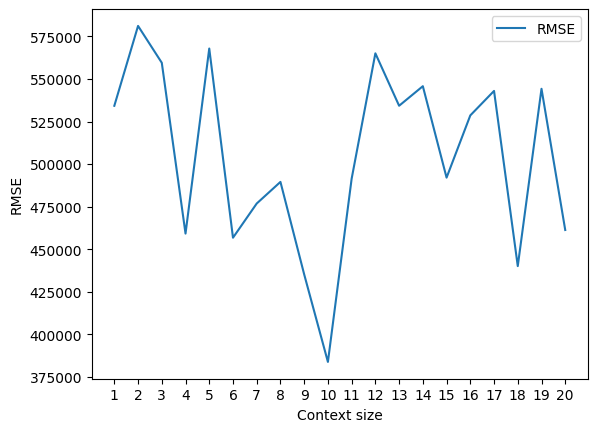

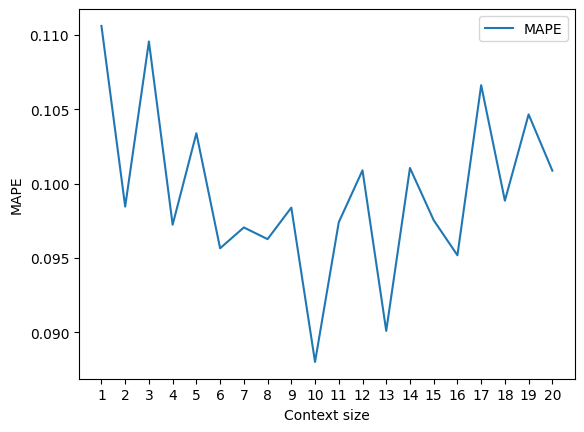

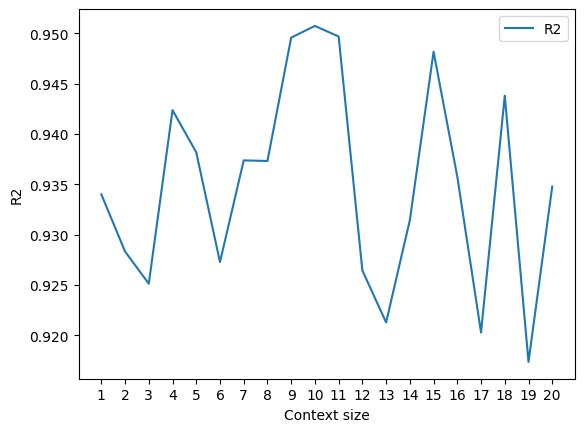

In [11]:
from matplotlib import axes, pyplot


def plot_metric(values: List[float], *, label: str) -> None:
    axes.Axes.set_xticks(pyplot.gca(), ticks=range(1, 21))
    pyplot.plot(range(1, 21), values, label=label)
    pyplot.xlabel("Context size")
    pyplot.ylabel(label)
    pyplot.legend()
    pyplot.show()


plot_metric(rmse, label="RMSE")
plot_metric(mape, label="MAPE")
plot_metric(r2, label="R2")

In [12]:
CONTEXT_SIZE = 10
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)

scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 383813.4487518768,
 'mape': 0.08800356073244418,
 'r2': 0.9507311162394263}

In [13]:
test = pandas.read_csv("../data/tesla/test.csv")
test.drop("Date", axis=1, inplace=True)
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)

test_input_scaled = scaler.transform(test_input)
metrics(test_output, model.predict(test_input_scaled))

{'rmse': 373242.34944019414,
 'mape': 0.07023781514118727,
 'r2': 0.8386239651445178}